# Feedbacks From Twitter

The purpose of this project is to work with new libraries and packages.
In this notebook, tweets are gathered to give feedbacks on a specific topic the user chooses such as books, movies, services, arguments. I worked with new libraries and packages such as snscrape and transformers. Snscrape is a library used to scrape tweets throught Twitter's API. Then the tweets are stored in a dataframe. Using pipeline in the transformers package, sentiment analysis was used to classify the tweets texts as negative or positive. Then the hashtags are counted and the top 10 hashtags are dumped in a json file. 


In [1]:
import pandas as pd
import snscrape.modules.twitter as twitter
import matplotlib.pyplot as plt
from transformers import pipeline
import json

The tweets are gathered from 1 year, we can let the user decide on the dates of the tweets. The example used in the notebook is vaccine debate in France. The code can be used for different things too.


In [5]:
print('Enter the keywords and separate them with \033[92m"AND"\033[0m as the example below and try to be specific with your search ')
print('To find recommendations about Pride and Prejudice, enter:\033[94mpride and prejudice AND book AND movie \033[0m\n')
print('\033[0;37;41mNow your turn!!\033[0m')
name = input("Enter keywords : ")
search = name + " since:2021-01-01 until:2022-01-01"
num_tweets = int(input("How many tweets would you like to read? :"))
item = twitter.TwitterSearchScraper(search, False).get_items()
tweets_list = []


def read_tweets():
    for i, tweet in enumerate(item):
        if i < num_tweets:
            tweets_list.append({
                "id": tweet.id,
                "Text": tweet.content,
                "tweet_date": tweet.date,
                "User_Id": tweet.user.id,
                "UserName": tweet.user.username,
                "display_name": tweet.user.username,
                "hashtags": tweet.hashtags if tweet.hashtags is not None else [],
            })
    return tweets_list

#Depending on the search keywords, it might take much more time to find the tweets.
#for example searching for feedback on a book, takes much less time than vaccine debate
# We can decrease the number of tweets or the start and end date of the tweets if it's taking too much time

Enter the keywords and separate them with "AND" as the example below and try to be specific with your search 
To find recommendations about Pride and Prejudice, enter:pride and prejudice AND book AND movie 

Now your turn!!
Enter keywords : vaccin AND France AND covid
How many tweets would you like to read? :500


In [6]:
data = pd.DataFrame(read_tweets())
df = data[['id', 'Text', 'tweet_date', 'User_Id', 'UserName', 'display_name']]
df.head(10)

id                                               Text  \
0  1477061451655299075  L'énigme vaccin COVID, la France est à 90% de ...   
1  1477059500586594304  🔴 VACCIN - Au 30 décembre 2021, 52 901 196 per...   
2  1477053649796882451  Macron a dit que le vaccin reduit la propagati...   
3  1477038177525407744  @Misstic1989 @jacquesderosier @BFMTV @CNEWS @L...   
4  1477037096414105601  @BFMTV @MarleneSchiappa Vaccinés ou non -vacci...   
5  1477003007074213893  Belle année 2022 à tous sauf :\n- Ceux qui dis...   
6  1477001177283891200  POLEMIQUE SANTE \nLa France n'a toujours pas r...   
7  1476998957519839234  #Omicron #Covid \nSi c'était moi son conseil c...   
8  1476994233504604164  La #France au peloton de tête des pays vaccine...   
9  1476978739581833224  Ma France Va Mal &gt; TVLibertés &gt; Covid, v...   

                 tweet_date              User_Id         UserName  \
0 2021-12-31 23:37:47+00:00            595245004        MMGratien   
1 2021-12-31 23:30:02+00:00  1251151956271235072   cascoronavirus   
2 2021-12-31 23:06:47+00:00            779322920     indira_padpa   
3 2021-12-31 22:05:18+00:00  1369045554752327688     LaurencePino   
4 2021-12-31 22:01:00+00:00           2217715976    detrezlaurent   
5 2021-12-31 19:45:32+00:00            707278429     michelseydur   
6 2021-12-31 19:38:16+00:00  1239156901465726976           Q24H00   
7 2021-12-31 19:29:27+00:00             54852507  Severine_Serres   
8 2021-12-31 19:10:41+00:00            148301363        thyberius   
9 2021-12-31 18:09:07+00:00           1599480571  Patriote2France   

      display_name  
0        MMGratien  
1   cascoronavirus  
2     indira_padpa  
3     LaurencePino  
4    detrezlaurent  
5     michelseydur  
6           Q24H00  
7  Severine_Serres  
8        thyberius  
9  Patriote2France

The tweets are gathered in a dataframe with the text, username, user id, display name and tweet date. 

In [7]:
df.describe()

id       User_Id
count  5.000000e+02  5.000000e+02
mean   1.475744e+18  6.632331e+17
std    8.477019e+14  6.352813e+17
min    1.473963e+18  9.879010e+05
25%    1.475191e+18  8.284920e+08
50%    1.475901e+18  8.038512e+17
75%    1.476418e+18  1.317262e+18
max    1.477061e+18  1.475128e+18

Sentiment analysis or sentiment classification fall into the broad category of text classification tasks where you are supplied with a phrase, or a list of phrases and the classifier is supposed to tell if the sentiment behind that is positive, negative or neutral.


In [8]:
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [9]:
df1 = (
    data
    .assign(sentiment = lambda x: x['Text'].apply(lambda s: sentiment_classifier(s)))
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)
#Adding the score and label column after adding the tweet text to the sentiment pipeline

In [10]:
df1.head()

id                                               Text  \
0  1477061451655299075  L'énigme vaccin COVID, la France est à 90% de ...   
1  1477059500586594304  🔴 VACCIN - Au 30 décembre 2021, 52 901 196 per...   
2  1477053649796882451  Macron a dit que le vaccin reduit la propagati...   
3  1477038177525407744  @Misstic1989 @jacquesderosier @BFMTV @CNEWS @L...   
4  1477037096414105601  @BFMTV @MarleneSchiappa Vaccinés ou non -vacci...   

                 tweet_date              User_Id        UserName  \
0 2021-12-31 23:37:47+00:00            595245004       MMGratien   
1 2021-12-31 23:30:02+00:00  1251151956271235072  cascoronavirus   
2 2021-12-31 23:06:47+00:00            779322920    indira_padpa   
3 2021-12-31 22:05:18+00:00  1369045554752327688    LaurencePino   
4 2021-12-31 22:01:00+00:00           2217715976   detrezlaurent   

     display_name                                           hashtags  \
0       MMGratien                                                 []   
1  cascoronavirus  [Coronavirus, COVID19, COVID__19, COVIDー19, va...   
2    indira_padpa                                                 []   
3    LaurencePino                                                 []   
4   detrezlaurent                                                 []   

                                           sentiment     label     score  
0  [{'label': 'NEGATIVE', 'score': 0.965229392051...  NEGATIVE  0.965229  
1  [{'label': 'NEGATIVE', 'score': 0.976382732391...  NEGATIVE  0.976383  
2  [{'label': 'NEGATIVE', 'score': 0.898594200611...  NEGATIVE  0.898594  
3  [{'label': 'NEGATIVE', 'score': 0.978085041046...  NEGATIVE  0.978085  
4  [{'label': 'NEGATIVE', 'score': 0.982909321784...  NEGATIVE  0.982909

In [11]:
df1[['label','score']].head()

label     score
0  NEGATIVE  0.965229
1  NEGATIVE  0.976383
2  NEGATIVE  0.898594
3  NEGATIVE  0.978085
4  NEGATIVE  0.982909

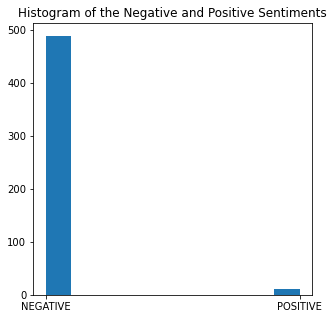

In [12]:
plt.figure(figsize=(5,5))
plt.hist(df1['label'])
plt.title('Histogram of the Negative and Positive Sentiments')
plt.show()


In [13]:
counts = df1['label'].value_counts()
counts

NEGATIVE    489
POSITIVE     11
Name: label, dtype: int64

In [14]:

positive_review = counts['POSITIVE']
negative_review = counts['NEGATIVE']
tweets_number = positive_review + negative_review
percentage_positive = (positive_review/tweets_number)*100
percentage_negative = (negative_review/tweets_number)*100
print('The percentage of the people supporting the topic : ',percentage_positive)
print('The percentage of the people against the topic : ',percentage_negative)

The percentage of the people supporting the topic :  2.1999999999999997
The percentage of the people against the topic :  97.8


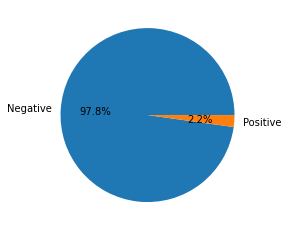

In [18]:
plt.figure()
plt.pie(counts ,autopct='%1.1f%%',labels=['Negative','Positive'])
plt.show()

In the following cells, the top 5 users with the highest score for the positive tweets are displayed.

In [19]:
with_ = df1.loc[df1['label'] == 'POSITIVE']
with_ = with_.nlargest(n=5,columns='score')
with_[['display_name','score']]

display_name     score
374  Frenchie2021  0.991998
401    klodiajury  0.979265
5    michelseydur  0.903497
201  chavaquiah06  0.824075
39     MaxouLeS21  0.821477

The top 5 users with the highest score for the negative tweets are displayed.

In [20]:
anti_ = df1.loc[df1['label'] == 'NEGATIVE']
anti_ = anti_.nlargest(n=5,columns='score')
anti_[['display_name','score']]

display_name     score
364     AMarreOnEn  0.999331
169  union_liberte  0.998594
20     loiccognet1  0.997943
126       TaiwanBN  0.996745
204  langlois_manu  0.996205

In the following cells, I tried to use a new package and stored the top hashtags in a json file. In the following function, the hashtags are counted and the top 10 are returned.

In [21]:
def get_hashtags():
    tweets = read_tweets()
    hashtags = {}
    for tweet in tweets:
        for hashtag in tweet['hashtags']:
            if hashtag in hashtags:
                hashtags[hashtag] = hashtags[hashtag] + 1
            else:
                hashtags[hashtag] = 1

    top_hashtags = list(hashtags.items())
    for i in range(0, len(top_hashtags) - 1):
        for j in range(i + 1, len(top_hashtags)):
            if top_hashtags[i][1] < top_hashtags[j][1]:
                maximum = top_hashtags[i]
                top_hashtags[i] = top_hashtags[j]
                top_hashtags[j] = maximum
    hashtags = top_hashtags[:10]
    return hashtags

This function defines a json file where the hashtags are dumped with their count.

In [22]:
def save_hashtags():
    json_file = open("hashtags.json", "w", encoding='utf-8')
    tags = json.dumps(get_hashtags(), indent=4, default=str, ensure_ascii=False)
    json_file.write(tags)


save_hashtags()

The project can be improved by building a GUI and use tkinter library.